# Full Text Screening
**Author:** Jack Galbraith-Edge

In [76]:
# Import libraries
from msc_code.scripts.notebook_setup import *

In [77]:
# Import results that were included from Title and Abstract Review.
import_path = os.path.join(PROC_DATA_DIR, "title_abstract_review", "title_abstract_review_include_final.csv") # Define import path.
title_abstract_included = pd.read_csv(import_path) # Import CSV to Pandas Dataframe.

# Take 'id', 'Publication Year', 'Authors', 'Title', 'Publication Title', 'Database' colums to create a new dataframe.
full_text_review_start_df = title_abstract_included[['id', 'Publication Year', 'Authors', 'Title', 'Publication Title', 'Database']]

# Add 'Exclude', 'Reason ID' and 'Comments' columns.
full_text_review_start_df['Exclude'] = None
full_text_review_start_df['Reason ID'] = None
full_text_review_start_df['Comments'] = None

# View first five rows of dataframe
full_text_review_start_df.head()

# Save the dataframe to a CSV file for full text screening.
full_text_review_start_df.to_csv("/".join([PROC_DATA_DIR, "full_text_screen", "full_text_screen_start.csv"]), index=False)

/var/folders/2z/pkyt34z93md62kmcdphb_kf00000gn/T/ipykernel_2202/2888286382.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_text_review_start_df['Exclude'] = None
/var/folders/2z/pkyt34z93md62kmcdphb_kf00000gn/T/ipykernel_2202/2888286382.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_text_review_start_df['Reason ID'] = None
/var/folders/2z/pkyt34z93md62kmcdphb_kf00000gn/T/ipykernel_2202/2888286382.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [78]:
# Define exclusion criteria:
exclusion_criteria = {
    1: "Full text not available in English.",
    2: "Studies not focusing on intentional ingestion of foreign object via the oral cavity (mouth).",
    3: "Studies focussing solely on accidental ingestion.",
    4: "Non-Human/Animal studies.",
    5: "Reviews, editorials, commentaries, and opinion pieces without original empirical data.",
    6: "Duplicate publications or studies with overlapping data sets (the most comprehensive or recent study will be included).",
    7: "Studies focusing on ingestion of substances (e.g. poisons, medications) rather than physical foreign objects.",
    8: "Ingestions undertaken in controlled environment as part of voluntary study.",
    9: "Ingestions not explicitly stated to be intentional."
}

In [79]:
# Troubleshoot errors in CSV encoding.

import_path = os.path.join(RAW_DATA_DIR, "full_text_screen", "full_text_screen_end_jge.csv")

# Identify the problematic line
with open(import_path, 'rb') as f:
    for i, line in enumerate(f):
        try:
            line.decode('utf-8')
        except UnicodeDecodeError:
            print(f"Error in line {i + 1}: {line}")
            break

In [80]:
# Reimport first author (JGE) screened results as pandas dataframe.
import_path = os.path.join(RAW_DATA_DIR, "full_text_screen", "full_text_screen_end_jge.csv")
jge_screened_df = pd.read_csv(import_path)

# Create dataframe of results not excluded in JGE full text screening.
jge_include = jge_screened_df[jge_screened_df['Exclude'] == False]

# Count number of results not excluded (included)
jge_include_count = len(jge_include)
print(f"Results screened and not excluded: {jge_include_count}")

# Create dataframe of results excluded in JGE full text screening. 
jge_excluded = jge_screened_df[jge_screened_df['Exclude'] == True]

# Count number of exclusions
jge_excluded_count = len(jge_excluded)

# Count number of unclear results
jge_excluded_unclear = jge_screened_df[(jge_screened_df['Exclude'] == True) & (jge_screened_df['Unclear'] == True)]
jge_excluded_unclear_count = len(jge_excluded_unclear)
print(f"Unclear exclusions excluded: {jge_excluded_unclear_count}")

# Count number of unclear paediatric exclusion
jge_exclude_paed_unclear = jge_screened_df[(jge_screened_df['Exclude'] == True) & (jge_screened_df['Unclear'] == True) & (jge_screened_df['Paediatric'] == True)]
jge_exclude_paed_unclear_count = len(jge_exclude_paed_unclear)
print(f"Unclear paediatric studies excluded: {jge_exclude_paed_unclear_count}")

# Count number of results where intention is unclear
jge_intention_unclear = jge_screened_df[jge_screened_df['Unclear'] == True]
jge_intention_unclear_count = len(jge_intention_unclear)
print(f"Intention was unclear in {jge_intention_unclear_count} results.")

# Create dataframe documenting exclusion reasoning
jge_excluded_reasoning = jge_excluded['Reason ID'].value_counts().rename('Count').reset_index()

# Map exclusion criteria category names to exclusion criteria Reason ID numerical values.
jge_excluded_reasoning['Reason'] = jge_excluded_reasoning['Reason ID'].map(exclusion_criteria)

# Print number of results excluded.
print(f"JGE excluded {jge_excluded_count} results during full text screening.")

# Create dataframe for items excluded without reason:
jge_exclude_no_reason = jge_excluded[(jge_excluded['Exclude'] == True ) & (jge_excluded['Reason ID'] == "NaN")]
jge_exclude_no_reason_count = len(jge_exclude_no_reason)
print(f"{jge_exclude_no_reason_count} records were excluded without a recorded reason.")
print(jge_exclude_no_reason if jge_exclude_no_reason_count > 0 else "All exclusions have reasons recorded.")

jge_excluded_reasoning

/var/folders/2z/pkyt34z93md62kmcdphb_kf00000gn/T/ipykernel_2202/1701119741.py:3: DtypeWarning: Columns (2,3,4,5,6,8,9,10,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  jge_screened_df = pd.read_csv(import_path)


Results screened and not excluded: 114
Unclear exclusions excluded: 66
Unclear paediatric studies excluded: 40
Intention was unclear in 87 results.
JGE excluded 158 results during full text screening.
0 records were excluded without a recorded reason.
All exclusions have reasons recorded.


,Reason ID,Count,Reason
0,9.0,71,Ingestions not explicitly stated to be intenti...
1,1.0,24,Full text not available in English.
2,5.0,24,"Reviews, editorials, commentaries, and opinion..."
3,2.0,18,Studies not focusing on intentional ingestion ...
4,3.0,8,Studies focussing solely on accidental ingestion.
5,6.0,5,Duplicate publications or studies with overlap...
6,7.0,2,Studies focusing on ingestion of substances (e...


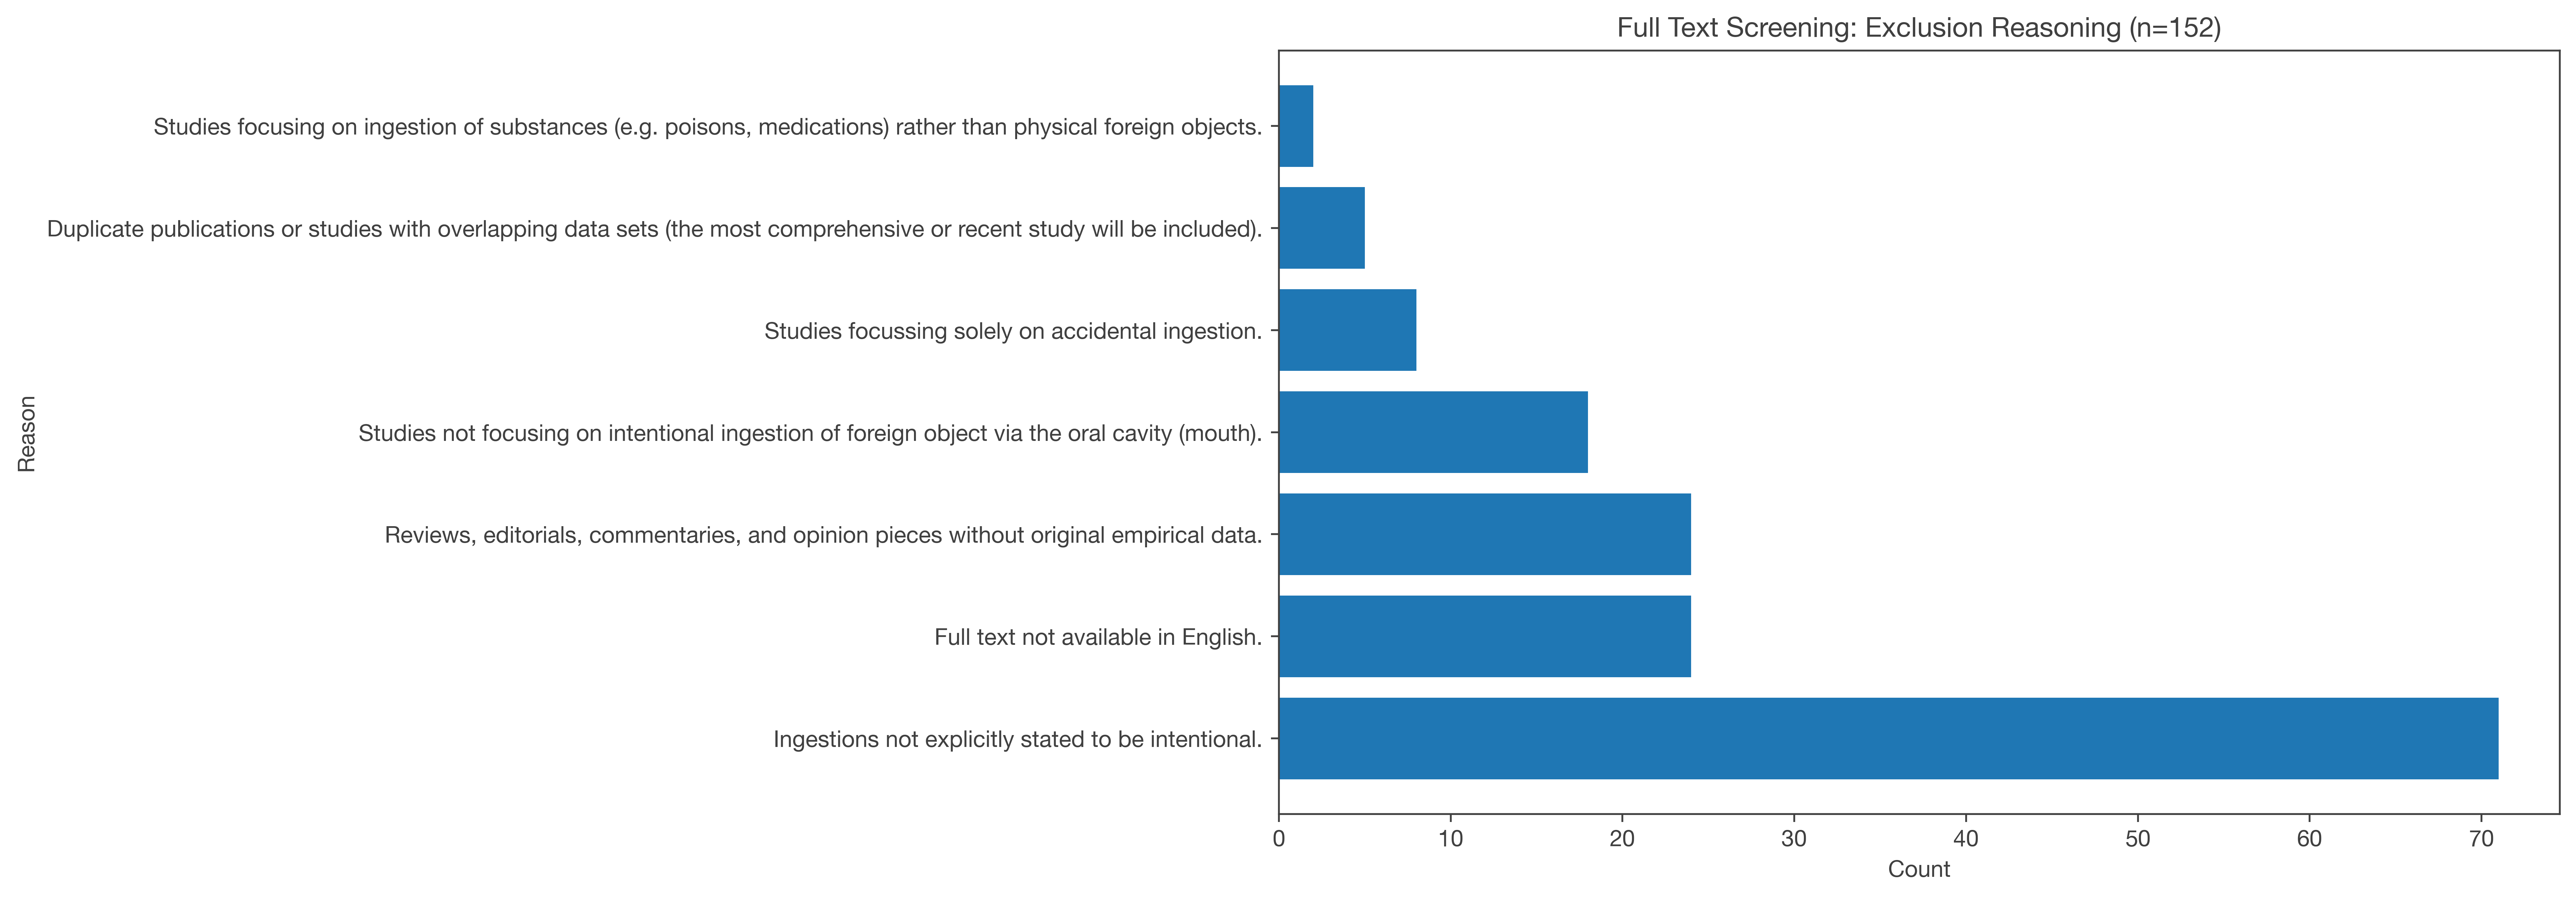

In [81]:
# Plot horizontal bar chart
plt.barh(y=jge_excluded_reasoning['Reason'],
         width=jge_excluded_reasoning['Count'])

# Plot labels
plt.xlabel("Count") # Y axis
plt.ylabel("Reason") # X axis
plt.title(f"Full Text Screening: Exclusion Reasoning (n={sum(jge_excluded_reasoning['Count'])})") # Title

# Show plot
plt.show()

In [82]:
# Generate table of results that include deliberate paediatric ingestion.
deliberate_paed_included_results = jge_include[(jge_include['Deliberate intention'] == True) & (jge_include['Paediatric'] == True)].sort_values(by=['Publication Year', 'Title']).reset_index(drop=True)

# Show Table
deliberate_paed_included_results

,id,Publication Year,Authors,Title,Publication Title,Database,Exclude,Reason ID,Paediatric,Intention Reported,Deliberate intention,Unclear,Accessed,Comments
0,60.0,1998.0,"Goldman, R. D.; Schachter, P.; Katz, M.; Bilik...",A Bizarre Bezoar: Case Report And Review Of Th...,Pediatric Surgery International,PubMed,False,NaN,True,True,True,True,29/01/2025,16 year old female. Toilet paper ingestion as ...
1,214.0,2015.0,"Tanrikulu, Y; Sen Tanrikulu, C; Karannan, S; S...",Ingestion Of Multiple Magnets For Suicide,Hong Kong Journal Of Emergency Medicine,Web of Science,False,NaN,True,True,True,NaN,30/01/2025,"""We presented a case in which a seventeen year..."
2,349.0,2020.0,"Ali, Alaa; Alhindi, Saeed",A Child With A Gastrocolic Fistula After Inges...,Cureus,PubMed,False,NaN,True,True,True,NaN,31/01/2025,9F with adjustment disorder who deliberately i...
3,345.0,2020.0,"Kapalu, Cml; Ibrahimi, N; Mentrikoski, Jm; Att...",Pediatric Recurrent Intentional Foreign Body I...,Journal Of Pediatric Gastroenterology And Nutr...,Web of Science,False,NaN,True,True,True,NaN,31/01/2025,Case series of 3 individuals with repetative d...
4,344.0,2020.0,"Kapalu, Cl; Lantos, J; Booser, A; Thomson, M; ...",Preventing Self-Harm From Repeat Foreign-Body ...,Pediatrics,Web of Science,False,NaN,True,True,True,NaN,31/01/2025,Ethical debate surrounding debate. Presents so...
5,353.0,2020.0,"Carius, Brandon M.; Dodge, P. M.; Long, Brit",Sharp Object In The Belly: A Case Of Pediatric...,Cureus,PubMed,False,NaN,True,True,True,NaN,31/01/2025,"Case report. 17F ""patient admitted to disassem..."
6,380.0,2021.0,"Al Shaaibi, Raya; Al Waili, Ibrahim",Laparoscopic Retrieval Of Ingested Foreign Body,Oman Medical Journal,PubMed,False,NaN,True,True,True,NaN,02/02/2025,Paediatric study. Case report. 15F ingested kn...


In [83]:
# Generate table of results of paediatric ingestions where the intention is unclear.
paed_intention_unclear = jge_screened_df[(jge_screened_df['Paediatric'] == True) & (jge_screened_df['Unclear'] == True)].sort_values(['Publication Year', 'Title']).reset_index(drop=True)
paed_intention_unclear

,id,Publication Year,Authors,Title,Publication Title,Database,Exclude,Reason ID,Paediatric,Intention Reported,Deliberate intention,Unclear,Accessed,Comments
0,33.0,1989.0,"Je Schunk, H Corneli, R Bolte",Pediatric Coin Ingestions: A Prospective Study...,American Journal Of Diseases Of ...,Google Scholar,True,9.0,True,False,NaN,True,29/01/2025,Paediatric study. Intention not mentioned.
1,50.0,1996.0,"Ps Lemberg, Dh Darrow...",Aerodigestive Tract Foreign Bodies In The Olde...,Annals Of Otology ...,Google Scholar,True,9.0,True,False,NaN,True,29/01/2025,Paediatric study. Not explicitly intentional. ...
2,53.0,1997.0,"Gilchrist, B. F.; Valerie, E. P.; Nguyen, M.; ...",Pearls And Perils In The Management Of Prolong...,Journal Of Pediatric Surgery,PubMed,True,9.0,True,False,NaN,True,29/01/2025,Paediatric study. Intention explicitly not rec...
3,60.0,1998.0,"Goldman, R. D.; Schachter, P.; Katz, M.; Bilik...",A Bizarre Bezoar: Case Report And Review Of Th...,Pediatric Surgery International,PubMed,False,NaN,True,True,True,True,29/01/2025,16 year old female. Toilet paper ingestion as ...
4,57.0,1998.0,"Se Morrow, Sw Bickler, Ap Kennedy, Cl Snyder...",Balloon Extraction Of Esophageal Foreign Bodie...,Journal Of Pediatric ...,Google Scholar,True,9.0,True,False,NaN,True,29/01/2025,Paediatric study. Intention not recorded.
5,58.0,1998.0,Ah Messner,Pitfalls In The Diagnosis Of Aerodigestive Tra...,Clinical Pediatrics,Google Scholar,True,9.0,True,False,NaN,True,29/01/2025,Paediatric study. Intention not mentioned.
6,71.0,2001.0,"Robins, B.; Das, A. K.",Anesthetic Management Of Acquired Tracheoesoph...,Anesthesia And Analgesia,PubMed,False,NaN,True,NaN,NaN,True,29/01/2025,15 month old with TEF 'presumably after eating...
7,98.0,2006.0,"Wong, Kenneth K. Y.; Fang, Christian X.; Tam, ...",Selective Upper Endoscopy For Foreign Body Ing...,Journal Of Pediatric Surgery,PubMed,True,NaN,True,False,NaN,True,29/01/2025,Paediatric study. Intention not mentioned.
8,100.0,2007.0,"Kalayci, Ayhan; Tander, Burak; Kocak, Sule; Ri...",Removal Of Open Safety Pins In Infants By Flex...,Journal Of Laparoendoscopic & Advanced Surgica...,PubMed,True,NaN,True,False,NaN,True,29/01/2025,Paediatric study. Intention not mentioned.
9,124.0,2008.0,"Grisel, Jedidiah J.; Richter, Gresham T.; Casp...",Acquired Tracheoesophageal Fistula Following D...,International Journal Of Pediatric Otorhinolar...,PubMed,True,9.0,True,False,NaN,True,29/01/2025,Paediatric study. Intention not mentioned.


In [84]:
jge_intention_reported_false = jge_screened_df[jge_screened_df['Intention Reported'] == False]
jge_no_reported_intention_count = len(jge_intention_reported_false)
print(jge_no_reported_intention_count)
jge_intention_reported_false

73


,id,Publication Year,Authors,Title,Publication Title,Database,Exclude,Reason ID,Paediatric,Intention Reported,Deliberate intention,Unclear,Accessed,Comments
12,33.0,1989.0,"Je Schunk, H Corneli, R Bolte",Pediatric Coin Ingestions: A Prospective Study...,American Journal Of Diseases Of ...,Google Scholar,True,9.0,True,False,NaN,True,29/01/2025,Paediatric study. Intention not mentioned.
13,38.0,1992.0,Wk Clarkston,Gastrointestinal Foreign Bodies: When To Remov...,Postgraduate Medicine,Google Scholar,True,9.0,NaN,False,NaN,True,29/01/2025,Single case study of schizophrenic male swallo...
18,50.0,1996.0,"Ps Lemberg, Dh Darrow...",Aerodigestive Tract Foreign Bodies In The Olde...,Annals Of Otology ...,Google Scholar,True,9.0,True,False,NaN,True,29/01/2025,Paediatric study. Not explicitly intentional. ...
21,53.0,1997.0,"Gilchrist, B. F.; Valerie, E. P.; Nguyen, M.; ...",Pearls And Perils In The Management Of Prolong...,Journal Of Pediatric Surgery,PubMed,True,9.0,True,False,NaN,True,29/01/2025,Paediatric study. Intention explicitly not rec...
24,57.0,1998.0,"Se Morrow, Sw Bickler, Ap Kennedy, Cl Snyder...",Balloon Extraction Of Esophageal Foreign Bodie...,Journal Of Pediatric ...,Google Scholar,True,9.0,True,False,NaN,True,29/01/2025,Paediatric study. Intention not recorded.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,404.0,2022.0,K Zhang,Endoscopic Management Of Esophageal Foreign Bo...,NaN,Google Scholar,True,9.0,NaN,False,NaN,True,02/02/2025,Single-centre 3 year retrospective review of o...
263,410.0,2022.0,"Jackson, Richard; Chabrillac, Emilien; Bell, A...",Rigid Versus Flexible Endoscopy For Managing I...,European Archives Of Oto-Rhino-Laryngology : O...,PubMed,True,9.0,NaN,False,NaN,True,02/02/2025,Compares RE and FE for ingested foreign object...
264,412.0,2022.0,"Ahmed, Me; Refaie, Bm; Ahmed, Me; Ali, Aa; Dah...",Foreign Body Swallows With Airway Affection In...,Indian Journal Of Otolaryngology And Head & Ne...,Web of Science,True,9.0,True,False,NaN,True,02/02/2025,Single centre egyptian study looking at childr...
266,415.0,2022.0,"Atlas, Nir; Sinclair, Elizabeth M.; Simon, Har...",Management Of Esophageal Button Battery Ingest...,Pediatric Surgery International,PubMed,True,9.0,True,False,NaN,True,02/02/2025,Single centre retrospective study of pre- and ...


In [85]:
jge_intention_reported_true = jge_screened_df[jge_screened_df['Intention Reported'] == True]
jge_intention_reported_true

,id,Publication Year,Authors,Title,Publication Title,Database,Exclude,Reason ID,Paediatric,Intention Reported,Deliberate intention,Unclear,Accessed,Comments
23,55.0,1997.0,"Ae Altmann, J Ozanne-Smith",Non-Fatal Asphyxiation And Foreign Body Ingest...,Injury Prevention,Google Scholar,True,2.0,NaN,True,NaN,NaN,29/01/2025,Paper states: All cases of intentional injury ...
27,60.0,1998.0,"Goldman, R. D.; Schachter, P.; Katz, M.; Bilik...",A Bizarre Bezoar: Case Report And Review Of Th...,Pediatric Surgery International,PubMed,False,NaN,True,True,True,True,29/01/2025,16 year old female. Toilet paper ingestion as ...
28,61.0,1998.0,"Csaky, G; Szederkenyi, I; Botos, A; Kiss, I",Laparoscopic Removal Of A Foreign Body From Th...,Surgical Laparoscopy & Endoscopy,Web of Science,False,NaN,NaN,True,True,NaN,29/01/2025,"22 year old swallowed blade, suicidal intention."
36,80.0,2004.0,"Butterworth, J. R.; Wright, K.; Boulton, R. A....",Management Of Swallowed Razor Blades-Retrieve ...,Gut,PubMed,False,NaN,NaN,True,True,NaN,29/01/2025,Question and answer regarding 16 year old boy ...
40,85.0,2004.0,"Tupesis, J. P.; Kaminski, A.; Patel, H.; Howes...",A Penny For Your Thoughts: Small Bowel Obstruc...,Journal Of Emergency Medicine,PubMed,False,NaN,NaN,True,True,NaN,29/01/2025,"""the patient admit to deliberate ingestion of ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,409.0,2022.0,"Apikotoa, Sharie; Ballal, Helen; Wijesuriya, R...",Endoscopic Foreign Body Retrieval From The Cae...,International Journal Of Surgery Case Reports,PubMed,False,NaN,NaN,True,True,NaN,02/02/2025,Case report. 35M prisoner deliberate ingestion...
265,414.0,2022.0,"Ali, Ahmed; Mahgoub, Ali M.; Emad, Samar; Abde...",Endoscopic Retrieval Of An Ingested Mobile Pho...,Cureus,PubMed,False,NaN,NaN,True,True,NaN,02/02/2025,Case report. 35M prisoner intentionally ingest...
267,416.0,2022.0,"Bozorgmehr, Ramin; Bahadorinia, Mahsa; Pouyanf...",A Rare Case Of Abdominal Foreign Bodies; Lapar...,Annals Of Medicine And Surgery (2012),PubMed,False,NaN,NaN,True,True,NaN,02/02/2025,Case report. 26F intentionally swallowed two s...
268,417.0,2022.0,"Boumarah, Dhuha N.; Binkhamis, Lujain S.; Aldu...",Foreign Body Ingestion: Is Intervention Always...,Annals Of Medicine And Surgery (2012),PubMed,True,3.0,NaN,True,False,NaN,02/02/2025,Case report. 43M accidentally swallowed a screw.
